# Competencia Kaggle - aciertos de Kobe Bryant

# SILVERIO CARMONA LOZANO		199618115
# JOHAN DAVID SUAREZ ACERO		200713010
# LADY DIANA OÑATE VEGA			200814451
# CARLOS JORGE QUISPE            201627368

## Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? ​


Procedemos a importar las librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from pygam import LogisticGAM
from sklearn.neural_network import MLPClassifier

In [154]:
df_KB = pd.read_csv('data.csv', sep=',')

Exploramos las variables importadas para ver el tipo de variables con las que se va a trabajar la predicción.

In [155]:
df_KB.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [156]:
df_KB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [157]:
df_KB.dtypes
df_KB.shape

(30697, 25)

Describimos las variables numéricas

In [158]:
df_KB.describe(include =['number'])

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


Describimos las variables categoricas

In [159]:
df_KB.describe(include =['object', 'category'])

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697
unique,57,6,20,2,6,7,5,1,1559,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,2318,24271,13455,12625,9398,30697,50,1020,1978


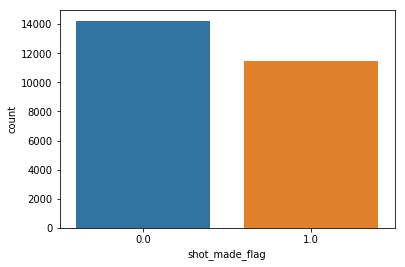

In [160]:
sns.countplot(x='shot_made_flag', data=df_KB);
plt.show()

In [268]:
# Generamos una copia del dataframe original 
dfKB_copy = df_KB.copy() 
target = dfKB_copy['shot_made_flag'].copy()

In [269]:
dfKB_copy.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
game_event_id,1.000000,-0.002553,-0.060091,-0.028404,0.060091,-0.028404,-0.270736,0.956042,-0.004507,-0.021293,0.062077,-0.037232,NaN,0.028478
game_id,-0.002553,1.000000,0.013021,-0.019553,-0.013021,-0.019553,0.014481,0.009879,0.917235,-0.007107,-0.030327,-0.001612,NaN,0.761656
lat,-0.060091,0.013021,1.000000,0.016217,-1.000000,0.016217,0.071462,-0.041248,-0.001143,0.052714,-0.818517,0.148070,NaN,-0.030790
loc_x,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
loc_y,0.060091,-0.013021,-1.000000,-0.016217,1.000000,-0.016217,-0.071462,0.041248,0.001143,-0.052714,0.818517,-0.148070,NaN,0.030790
lon,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
minutes_remaining,-0.270736,0.014481,0.071462,0.006898,-0.071462,0.006898,1.000000,-0.043425,0.015101,0.025558,-0.059767,0.028342,NaN,-0.005731
period,0.956042,0.009879,-0.041248,-0.028165,0.041248,-0.028165,-0.043425,1.000000,0.008789,0.005832,0.046993,-0.032152,NaN,0.000364
playoffs,-0.004507,0.917235,-0.001143,-0.012790,0.001143,-0.012790,0.015101,0.008789,1.000000,-0.002490,-0.008667,-0.001257,NaN,0.612571
seconds_remaining,-0.021293,-0.007107,0.052714,0.001083,-0.052714,0.001083,0.025558,0.005832,-0.002490,1.000000,-0.051482,0.030804,NaN,-0.004868


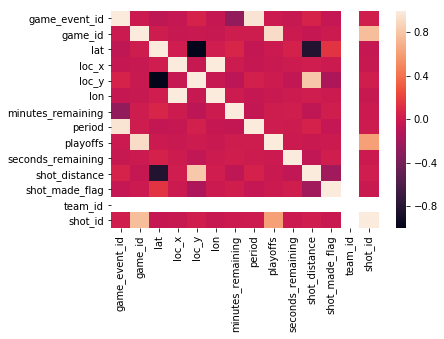

In [270]:
# Consultamos correlación entre variables
corr = df_KB.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

In [271]:
# Remover variables no representativas para nuestro modelo
dfKB_copy.drop('team_id', axis=1, inplace=True) # ID equipo es único
dfKB_copy.drop('lat', axis=1, inplace=True) # correlacionada con loc_x de acuerdo a la gráfica anterior
dfKB_copy.drop('lon', axis=1, inplace=True) # correlacionada con loc_y de acuerdo a la gráfica anterior
dfKB_copy.drop('game_id', axis=1, inplace=True) # Independente
dfKB_copy.drop('game_event_id', axis=1, inplace=True) # Independente
dfKB_copy.drop('team_name', axis=1, inplace=True) # Siempre es el mismo equipo LA Lakers
dfKB_copy.drop('game_date', axis=1, inplace=True) # Siempre es el mismo equipo LA Lakers

In [272]:
#revisa la cantidad de NA en la variable respuesta 
dfKB_copy.isnull().sum()

action_type              0
combined_shot_type       0
loc_x                    0
loc_y                    0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [273]:
target.head()

0    NaN
1    0.0
2    1.0
3    0.0
4    1.0
Name: shot_made_flag, dtype: float64

### A continuación vamos a verificar las variables categóricas para ver cuales requieren algún tipo de tratamiento 

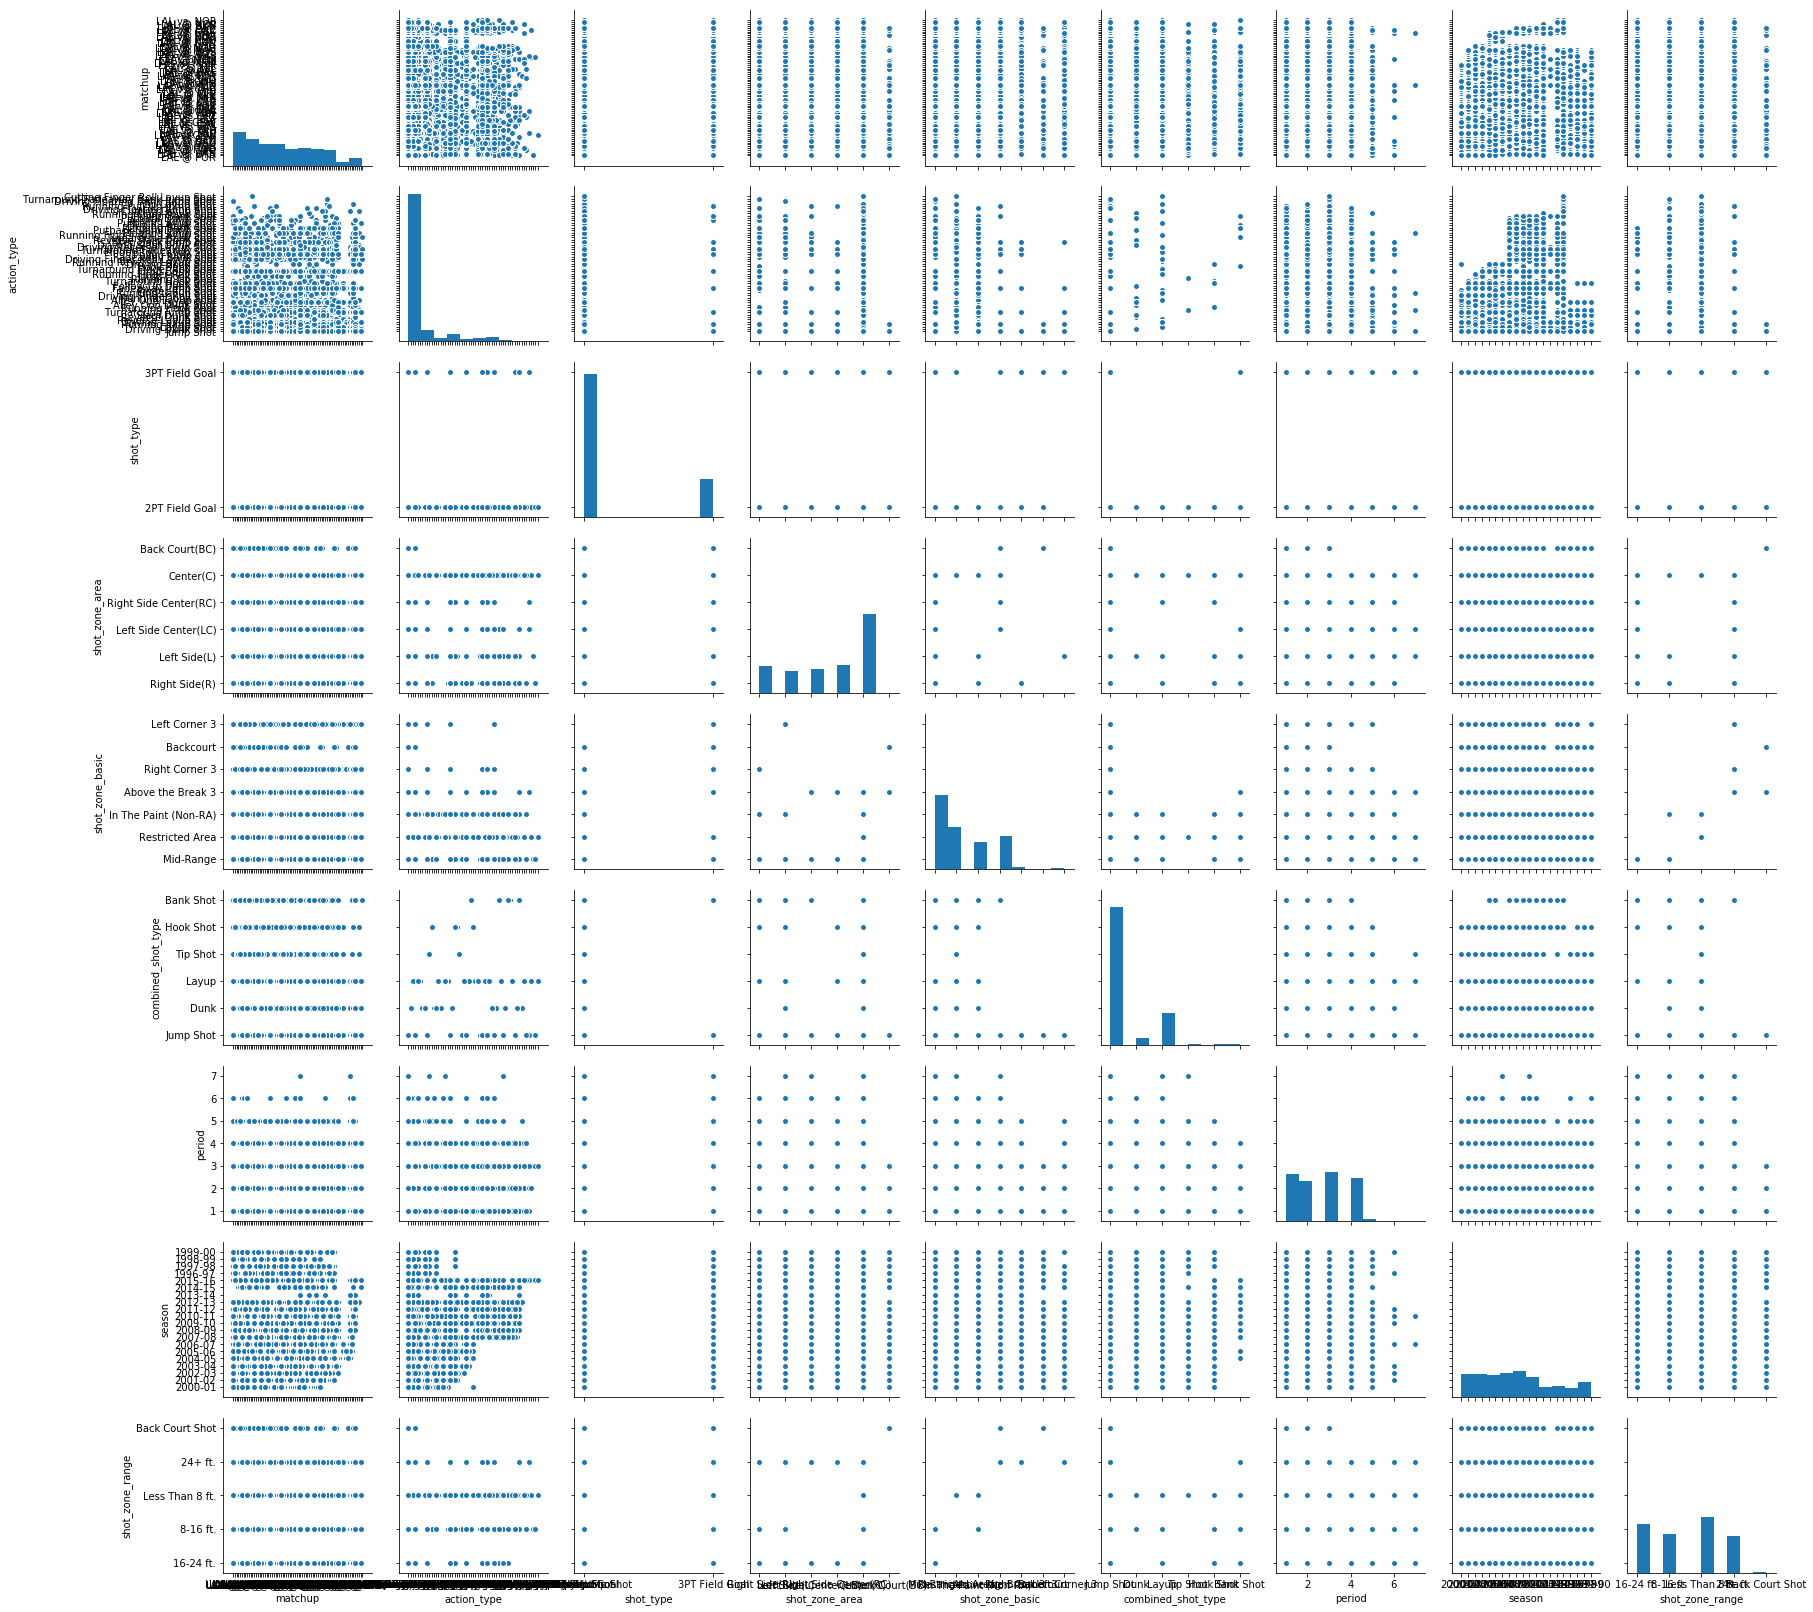

In [274]:
sns.pairplot(dfKB_copy, vars=['matchup', 'action_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'combined_shot_type','period', 'season','shot_zone_range'])
plt.show()

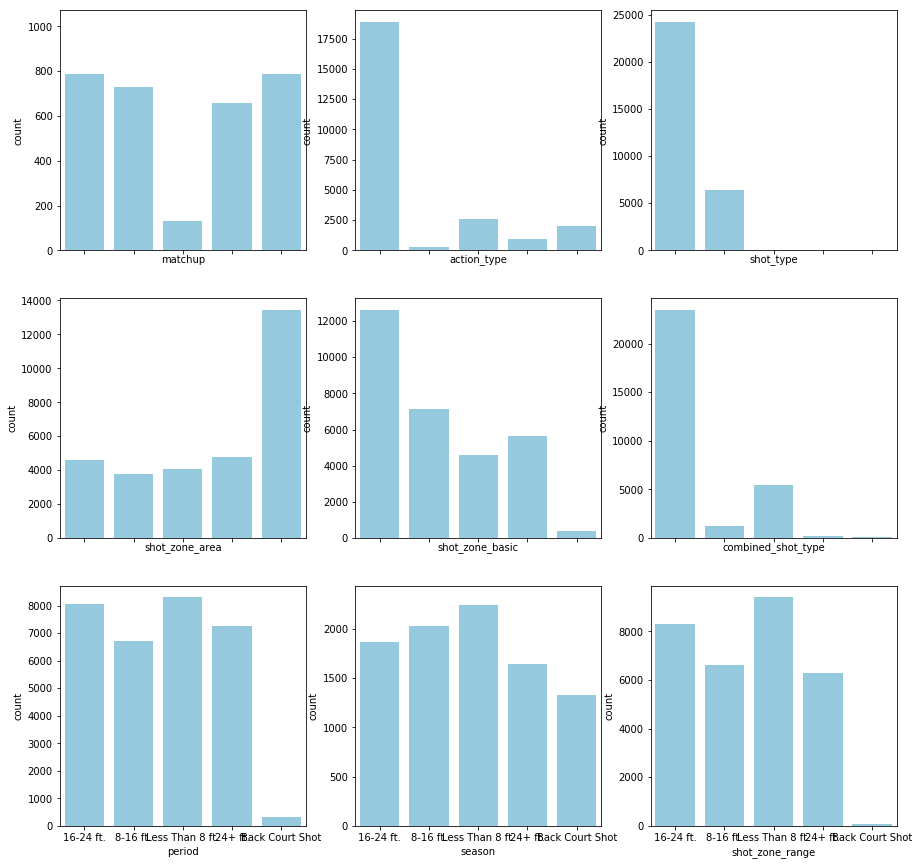

In [275]:
# plot
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True )
sns.countplot(df_KB['matchup'], color="skyblue",ax=axes[0, 0])
sns.countplot(df_KB['action_type'], color="skyblue", ax=axes[0, 1])
sns.countplot(df_KB['shot_type'], color="skyblue", ax=axes[0, 2])
sns.countplot(df_KB['shot_zone_area'], color="skyblue", ax=axes[1, 0])
sns.countplot(df_KB['shot_zone_basic'], color="skyblue", ax=axes[1, 1])
sns.countplot(df_KB['combined_shot_type'], color="skyblue", ax=axes[1, 2])
sns.countplot(df_KB['period'], color="skyblue", ax=axes[2, 0])
sns.countplot(df_KB['season'], color="skyblue", ax=axes[2, 1])
sns.countplot(df_KB['shot_zone_range'], color="skyblue", ax=axes[2, 2])

#'matchup', 'action_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'combined_shot_type','period', 'season','shot_zone_range'                        
                        

### De acuerdo al análisis gráfico anterior solamente las variables action_type y combined_shot_type muestran una concentración alta en categorias. A continuación revisaremos en detalle

In [276]:
dfKB_copy['action_type'].value_counts()

Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot                      114
Driving Reverse Layup Shot               97
Hook Shot                                84
Driving Finger Roll Shot                 82
Alley Oop Layup shot                     80
Reverse Dunk Shot                        75
Running Layup Shot              

In [277]:
# Reducirmos el número de categorías de la variable action type a aquellas que están por encima de las 900 observaciones 
otras_acciones= dfKB_copy['action_type'].value_counts().sort_values().index.values[:51]
dfKB_copy.loc[dfKB_copy['action_type'].isin(otras_acciones), 'action_type'] = 'Other'

In [278]:
dfKB_copy['action_type'].value_counts()

Jump Shot               18880
Other                    4241
Layup Shot               2567
Driving Layup Shot       1978
Turnaround Jump Shot     1057
Fadeaway Jump Shot       1048
Running Jump Shot         926
Name: action_type, dtype: int64

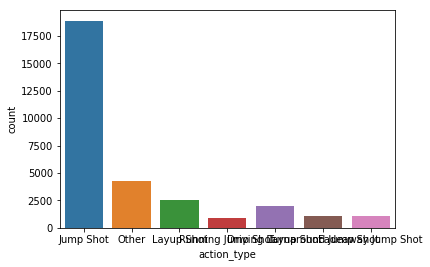

In [279]:
sns.countplot(x='action_type', data=dfKB_copy);
plt.show()

### Por otro lado la variable matchup, que representa si el partido es de local o visitante debe ser convertida a categórica  

In [280]:
## Convierte la variable matchup en categórica (1=local, 0= Visitante)
dfKB_copy['local'] = dfKB_copy['matchup'].str.contains('vs',na=False)
dfKB_copy.drop('matchup', axis=1, inplace=True)

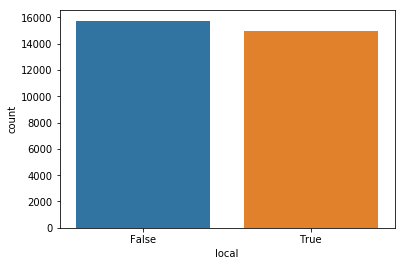

In [281]:
sns.countplot(x='local', data=dfKB_copy);
plt.show()

In [282]:
dfKB_copy.head()

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id,local
0,Jump Shot,Jump Shot,167,72,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,1,False
1,Jump Shot,Jump Shot,-157,0,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2,False
2,Jump Shot,Jump Shot,-101,135,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,3,False
3,Jump Shot,Jump Shot,138,175,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,4,False
4,Other,Dunk,0,0,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,5,False


In [283]:
categorial_cols = ['action_type','combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area','shot_zone_basic', 'shot_zone_range', 'opponent']

In [284]:
for cc in categorial_cols:
    dummies = pd.get_dummies(dfKB_copy[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    dfKB_copy.drop(cc, axis=1, inplace=True)
    dfKB_copy = dfKB_copy.join(dummies)

In [285]:
#Finally, we build train and test dataframes
dftrain=dfKB_copy.dropna()
dftest=dfKB_copy[dfKB_copy['shot_made_flag'].isnull()]

In [346]:
dftest.drop('shot_made_flag', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [286]:
dfKB_copy.shape

(30697, 102)

In [287]:
dftrain.shape

(25697, 102)

In [288]:
dftest.shape

(5000, 102)

## Selección de variables

### Por medio de la librería feature selection y utilizando un Logit como punto de referencia, se hace una búsqueda de las variables mas significativas con respecto a la variable predictora. Esto nos permite reducir la dimensionalidad de la base y ajustar los modelos con variables que de antemano se sabe son significativas

In [289]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [292]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [303]:
y = dftrain['shot_made_flag']
X = dftrain.drop('shot_made_flag', axis=1)

for model in models.keys():
    models[model].fit(X_train, y_train)
model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(X,y)

print(rfe.support_)
print(rfe.ranking_)

feature_rfe_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': rfe.ranking_
    })

feat_rfe = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe


[False False False False False False False  True False  True  True False
  True False False  True  True False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False  True False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[91 90 73 64 85 89 59  1 47  1  1  2  1 82  4  1  1 81 58  1 51 72 88 20
 26 24 21 87 17 31 34 33 52 55 65 57 27 32 36 35 56 74 60 63  9  6  3 25
 46  1 14 16 84 15 44 12  1 37 28 39 19 86 10 11 13  1 38 50  5 40 67 79
 83 68 61 66 42 30 43 80 49 48 75 76 18 54 69  8  7 41 77 22 71 23 78 45
 29 62 53 70]


array(['action_type#Driving Layup Shot', 'action_type#Jump Shot',
       'action_type#Layup Shot', 'action_type#Running Jump Shot',
       'combined_shot_type#Dunk', 'combined_shot_type#Hook Shot',
       'combined_shot_type#Tip Shot', 'shot_zone_area#Back Court(BC)',
       'shot_zone_basic#Backcourt', 'shot_zone_range#Back Court Shot'],
      dtype=object)

# Modelos evaluados para la predicción
## Se usaron 7 diferentes clasificadores.

### Regresión logística, arboles de deccision, Naives Bayes, K vecinos, Random Forest, GAM Modelos aditivos generalizados y redes neuronales.

In [386]:
# Modelos

models = {'lg': LogisticRegression(),
          'dt': DecisionTreeClassifier(),
          'nb': GaussianNB(),
          'nn': KNeighborsClassifier(),
          'rf': RandomForestClassifier(),
          'gm': LogisticGAM(),
          'rn': MLPClassifier()}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

for model in models.keys():
    models[model].fit(X_train, y_train)

    
# predict test for each model
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
    
for model in models.keys():
    print('accuracy    '+ model, metrics.accuracy_score(y_test, y_pred[model]))
    print('f1_score    '+ model, metrics.f1_score(y_test, y_pred[model]))
    print('f1 beta score ' + model, metrics.fbeta_score(y_test, y_pred[model],10))

accuracy    lg 0.6817120622568094
accuracy    dt 0.5769649805447471
accuracy    nb 0.5831906614785992
accuracy    nn 0.5557976653696498
accuracy    rf 0.6547859922178988
accuracy    gm 0.6785992217898833
accuracy    rn 0.6121400778210117


## Luego de evaluar los diferentes modelos, se tuvieron en cuenta las 3 medidas de desempeño calculadas. El accuracy, el f1 score y el f1 betas score. Los mejores resultados teniendo en cuenta estos criterios fueron para Regresión logística, GAMS y random forest en ese orden

In [354]:
id_test = dftest.shot_id
id_test
dftest.drop('shot_id', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [383]:
y_pred_lg = models['rf'].predict(dftest)

In [384]:
list(y_pred_lg)

[0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0

# Guardamos la predicción en un archivo csv. que se subió a la página de la competencia en kaggle.

In [385]:
import csv
data_sub = {'shot_id' : id_test ,
          'shot_made_flag' : y_pred_lg
            }
df_sub = pd.DataFrame(data_sub, index=None)
df_sub.to_csv('subfile.csv', sep=',')

In [376]:
dftest.describe()

,loc_x,loc_y,minutes_remaining,playoffs,seconds_remaining,shot_distance,action_type#Driving Layup Shot,action_type#Fadeaway Jump Shot,action_type#Jump Shot,action_type#Layup Shot,...,opponent#PHI,opponent#PHX,opponent#POR,opponent#SAC,opponent#SAS,opponent#SEA,opponent#TOR,opponent#UTA,opponent#VAN,opponent#WAS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.915600,90.337600,4.879600,0.148200,28.640200,13.336400,0.070000,0.035200,0.608800,0.082600,...,0.023400,0.049200,0.049400,0.049200,0.068000,0.026800,0.021600,0.050400,0.008400,0.019800
std,110.399352,85.917998,3.436956,0.355334,17.247847,9.299405,0.255173,0.184303,0.488068,0.275304,...,0.151185,0.216307,0.216723,0.216307,0.251771,0.161515,0.145388,0.218791,0.091275,0.139326
min,-246.000000,-42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-71.000000,4.000000,2.000000,0.000000,14.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,76.000000,5.000000,0.000000,29.000000,15.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,96.250000,157.000000,8.000000,0.000000,43.000000,20.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,241.000000,592.000000,11.000000,1.000000,59.000000,61.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [352]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 30693
Columns: 101 entries, loc_x to opponent#WAS
dtypes: bool(1), int64(7), uint8(93)
memory usage: 771.5 KB


In [365]:
df_sub

,shot_id,shot_made_flag
0,1,0.0
7,8,0.0
16,17,1.0
19,20,1.0
32,33,0.0
33,34,0.0
34,35,0.0
35,36,0.0
36,37,1.0
37,38,0.0
